In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warning
warning.filterwarnings("ignore")

In [2]:
df = pd.read_csv("~/Downloads/gld_price_data.csv")

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df.shape

(2290, 6)

In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4), ' % missing values')
else:
    print("No missing value found")

No missing value found


In [8]:
for column in df.columns:
    print(column,df[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


In [9]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['GLD']))]
categorical_features

['Date']

In [10]:
for feature in categorical_features:
    print("The feautre is {} and number of categories are {}".format(feature,len(df[feature].unique())))

The feautre is Date and number of categories are 2290


In [11]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['GLD']))]
print('Number of numerical variables: ',len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  4


,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [12]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique()) < 25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [13]:
continous_features=[feature for feature in numerical_features if feature not in discrete_feature+['GOD']]
print("Continous Feature Count: {}".format(len(continous_features)))

Continous Feature Count: 4


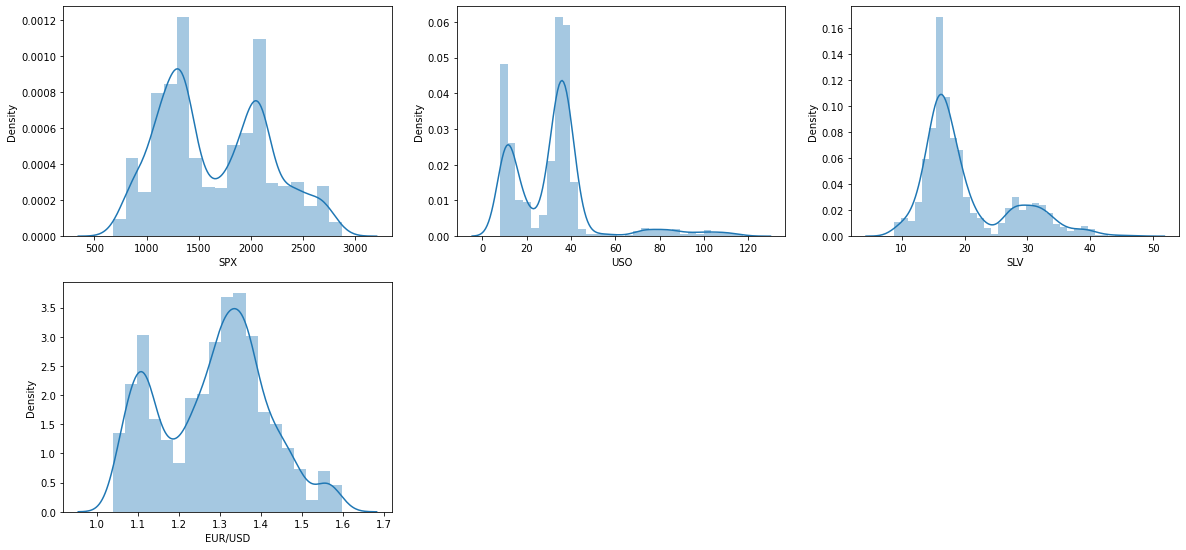

In [14]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber = 1
for continous_feature in continous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continous_feature])
    plt.xlabel(continous_feature)
    plotnumber+=1
plt.show()

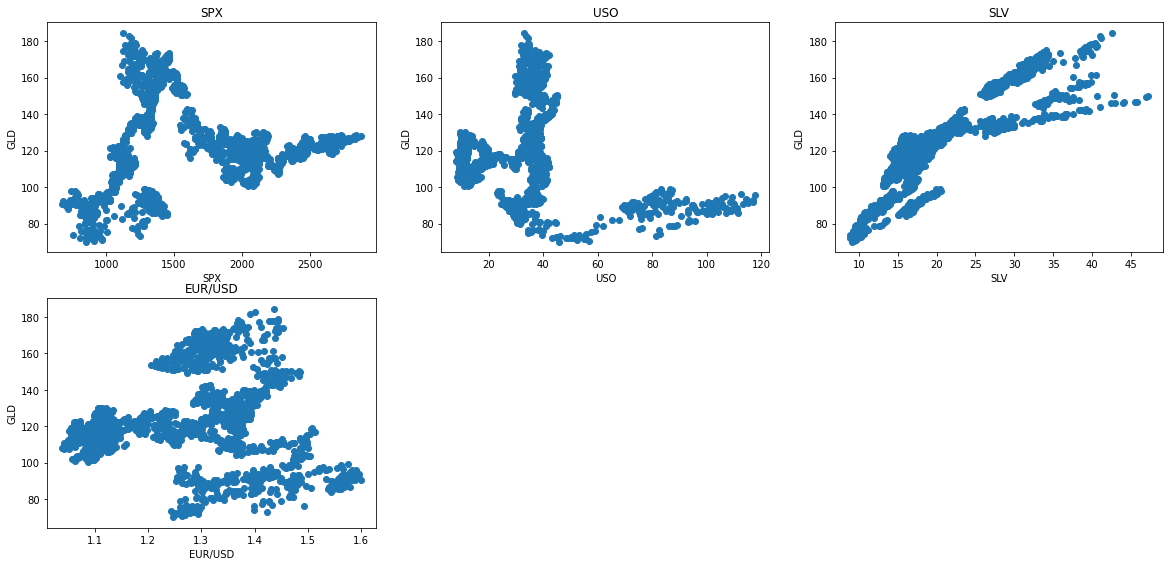

In [15]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber = 1
for feature in continous_features:
    data = df.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(data[feature],data['GLD'])
    plt.xlabel(feature)
    plt.ylabel('GLD')
    plt.title(feature)
    plotnumber+=1
plt.show()

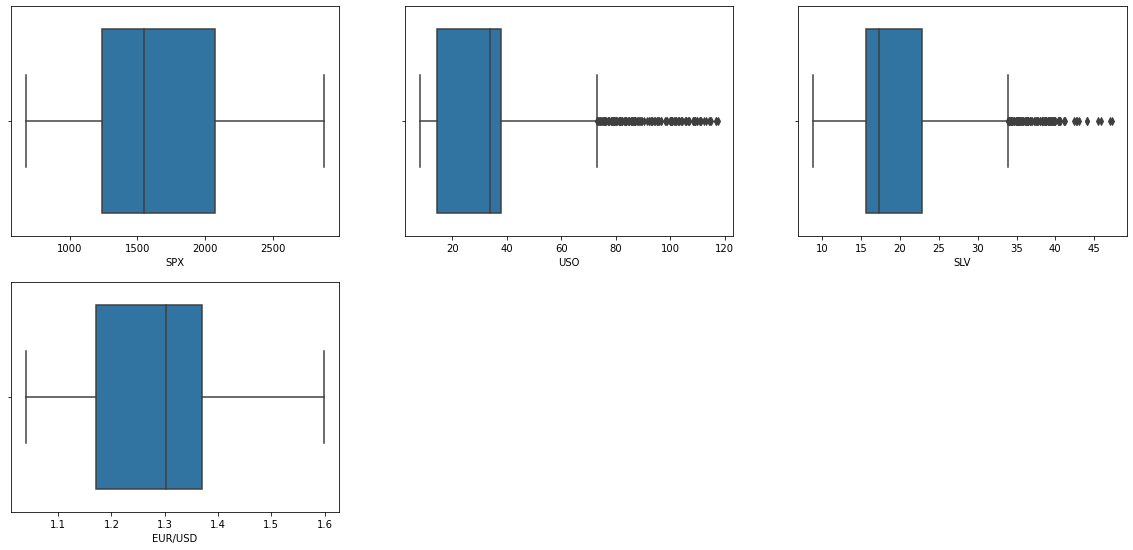

In [16]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

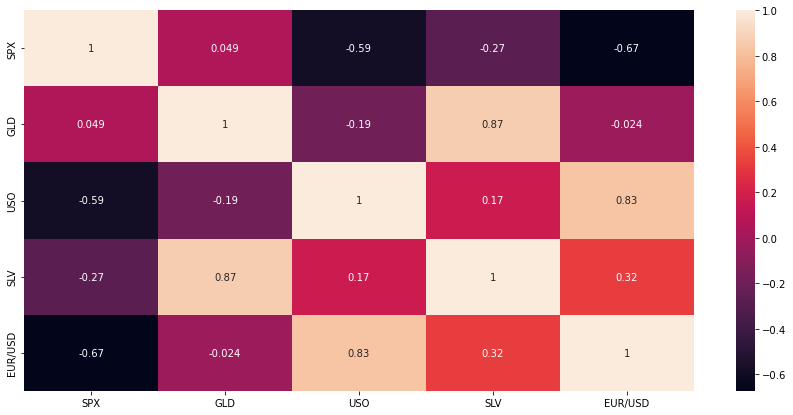

In [17]:
cor_mat = df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)
plt.show()

In [18]:
print(cor_mat['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



In [19]:
df2 = df.copy()

In [20]:
df2.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [21]:
df2.drop(['Date'],axis=1,inplace=True)

In [22]:
X = df2.drop(['GLD'],axis=1)
y = df2['GLD']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
len(X_train)

1832

In [24]:
len(X_test)

458

In [ ]:
X_train

In [25]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [26]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'decision_tree': {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best','random'] }
            },
            'RandomForestRegressor' : {
                'model' : RandomForestRegressor(),
                'params': {
                    'n_estimators': [10,50,100,130],
                    'criterion': ['mse'],
                    'max_depth': range(2,4,1),
                    'max_features': ['auto','log2']
                } 
            },
            'XGBRegressor' : {
                'model' : XGBRegressor(),
                'params' : {
                    'learning_rate' : [0.5, 0.1, 0.01, 0.001],
                    'max_depth' : [2, 3],
                    'n_estimators' : [10, 50, 100, 200]
                }
            }
        }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [27]:
pd.set_option('display.max_colwidth',100)
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,decision_tree,0.982685,"{'criterion': 'friedman_mse', 'splitter': 'random'}"
1,RandomForestRegressor,0.908800,"{'criterion': 'mse', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 130}"
2,XGBRegressor,0.984461,"{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}"


In [28]:
model_xgb = XGBRegressor()

In [29]:
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [30]:
model_xgb.score(X_test,y_test)

0.9890168067380418

In [31]:
y_pred = model_xgb.predict(X_test)

In [32]:
y_pred

array([128.07846 , 116.58004 , 140.29118 , 122.02655 ,  93.47845 ,
       152.73148 , 117.1758  , 112.79819 , 148.9887  , 105.208855,
       103.1184  , 120.183624,  92.43471 , 156.80748 , 121.42672 ,
       117.341606,  86.63259 ,  92.11299 ,  93.13703 , 123.48713 ,
        83.043175, 117.37038 , 125.94271 , 173.71443 , 169.92001 ,
       139.65176 , 114.262695, 161.85512 , 131.62967 , 115.60149 ,
       111.05125 , 104.582184, 128.81955 , 121.363884,  97.72189 ,
       120.377106,  86.49455 , 115.011856, 127.48014 , 139.91621 ,
       108.99186 , 132.03302 , 102.27399 , 133.19984 , 135.04265 ,
       150.19016 , 120.21305 , 160.4436  , 156.03621 , 127.56957 ,
       122.426956, 113.30193 , 124.549324, 118.56411 , 153.61505 ,
       124.33473 , 111.84775 ,  86.54873 , 156.8647  , 118.879   ,
        88.004395, 114.42819 ,  82.94642 , 146.39336 , 126.58683 ,
       127.50794 , 125.03782 , 121.28393 , 168.07477 , 122.08874 ,
       125.759125, 172.96252 , 121.80695 , 173.00119 , 120.313

In [33]:
y_test

1255    128.789993
2100    115.620003
711     139.220001
1328    120.930000
53       93.040001
           ...    
2085    120.360001
1362    129.130005
828     159.869995
567     117.339996
1693    106.379997
Name: GLD, Length: 458, dtype: float64